# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [72]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [73]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [74]:
dados.shape

(76840, 7)

In [75]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [76]:
dados['UF']

,UF
0,Rondônia
1,Rondônia
2,Rondônia
3,Rondônia
4,Rondônia
...,...
76835,Distrito Federal
76836,Distrito Federal
76837,Distrito Federal
76838,Distrito Federal


In [77]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [78]:
uf = dados['UF'].value_counts()
uf

,count
UF,
São Paulo,8544
Minas Gerais,7686
Rio Grande do Sul,6322
Bahia,5717
Rio de Janeiro,5556
Pará,4449
Paraná,4356
Pernambuco,3820
Goiás,3478


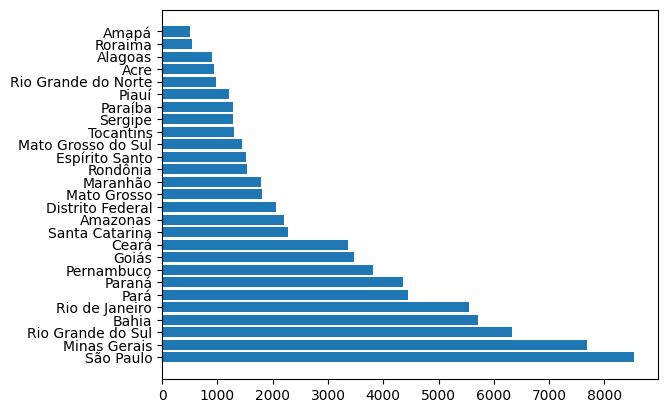

In [79]:
plt.barh(uf.index, uf.values)
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [80]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

##### Sexo

In [81]:
dados['Cat.Sexo'] = pd.Categorical(dados['Sexo'],
                                          categories=[0,1], ordered=True)

In [82]:
dados['Cat.Sexo'] = dados['Cat.Sexo'].map(sexo)

In [83]:
dados_distintos = dados[['Sexo', 'Cat.Sexo']].drop_duplicates()
dados_distintos

,Sexo,Cat.Sexo
0,0,Masculino
1,1,Feminino


##### Cor

In [84]:
dados['Cat.Cor'] = pd.Categorical(dados['Cor'],
                                         categories=[0,2,4,6,8], ordered=True)

In [85]:
dados['Cat.Cor'] = dados['Cat.Cor'].map(cor)

In [86]:
# Selecionando valores distintos e ordenando por 'Cat.Cor'
dados_distintos = dados[['Cor', 'Cat.Cor']].drop_duplicates()
dados_distintos

,Cor,Cat.Cor
0,8,Parda
1,2,Branca
8,4,Preta
35,6,Amarela
659,0,Indígena


##### Anos de Estudo

In [87]:
dados['Cat.Anos.de.Estudo'] = pd.Categorical(dados['Anos.de.Estudo'],
                                                    categories=range(1,18), ordered=True)

In [88]:
dados['Cat.Anos.de.Estudo'] = dados['Cat.Anos.de.Estudo'].map(anos_de_estudo)

In [89]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [90]:
print(f"Menor renda: {min(dados['Renda'])}\nMaior renda: {max(dados['Renda'])}")

Menor renda: 0
Maior renda: 200000


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [91]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [92]:
freq_sexo = dados.groupby('Cat.Sexo', observed=False).size().reset_index(name='freq_absoluta')

freq_sexo

,Cat.Sexo,freq_absoluta
0,Masculino,53250
1,Feminino,23590


In [93]:
freq_sexo['freq_relativa'] = round((freq_sexo['freq_absoluta'] / freq_sexo['freq_absoluta'].sum()) * 100, 1)
freq_sexo

,Cat.Sexo,freq_absoluta,freq_relativa
0,Masculino,53250,69.3
1,Feminino,23590,30.7


In [94]:
freq_sexo.columns = ['sexo', 'quantidade', 'porcentagem(%)']
freq_sexo

,sexo,quantidade,porcentagem(%)
0,Masculino,53250,69.3
1,Feminino,23590,30.7


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [95]:
dist_freq = pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'])
dist_freq

Cat.Cor,Indígena,Branca,Preta,Amarela,Parda
Cat.Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [96]:
freq_relativa = round(pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'], normalize = 'all') * 100,2)
freq_relativa

Cat.Cor,Indígena,Branca,Preta,Amarela,Parda
Cat.Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


In [97]:
freq_responsavel_cruzada = round(pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'], normalize='columns') * 100, 2)

> #### Conclusões

Em **todas as etnias analisadas**, observou-se que mais de **65% das pessoas** entrevistadas pertencem ao sexo biológico masculino. Esse percentual é ainda mais expressivo entre os indivíduos que se autodeclaram **indígenas**, grupo no qual mais de **70% dos entrevistados** são do sexo biológico masculino.

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [98]:
ticket_medio = round(pd.crosstab(dados['Cat.Sexo'], dados['Cat.Cor'], values=dados['Renda'], aggfunc='mean'), 2)

ticket_medio

Cat.Cor,Indígena,Branca,Preta,Amarela,Parda
Cat.Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


> #### Conclusões

Apenas na **etnia Indígena** observou-se que as pessoas do **sexo biológico feminino possuem uma renda média superior** à dos homens da mesma etnia, com uma diferença aproximada de **1,400**.
Nas **demais etnias**, verificam-se variações expressivas entre os sexos, com diferenças que variam de **800 - 1,700**, sendo esta última registrada na **etnia Amarela**.

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [99]:
medidas_renda = {
    'media': dados['Renda'].mean(),
    'mediana': dados['Renda'].median(),
    'moda': dados['Renda'].mode()[0],
    }

In [100]:
medidas_renda = pd.DataFrame(medidas_renda, index=[0])
medidas_renda

,media,mediana,moda
0,2000.383199,1200.0,788


#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [133]:
renda_top_5 = dados.groupby('UF')['Renda'].mean().sort_values(ascending=False).head()
renda_top_5

,Renda
UF,
Distrito Federal,4241.954722
São Paulo,2638.104986
Rio de Janeiro,2496.403168
Paraná,2493.870753
Santa Catarina,2470.854945


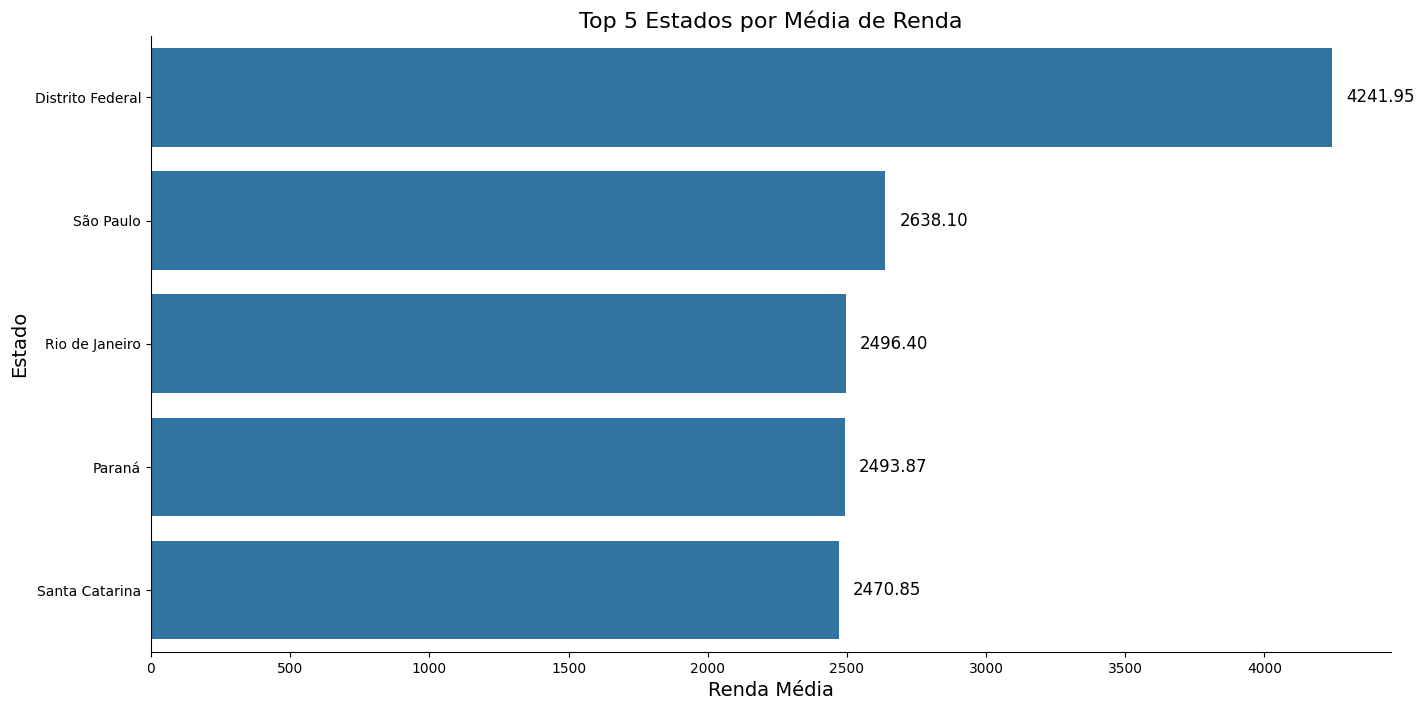

In [102]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x=renda_top_5.values, y=renda_top_5.index)

for i, v in enumerate(renda_top_5):
    ax.text(v + 50, i, f'{v:.2f}', va='center', fontsize=12)

plt.title('Top 5 Estados por Média de Renda', fontsize=16)
plt.xlabel('Renda Média', fontsize=14)
plt.ylabel('Estado', fontsize=14)
ax.spines[['top','right']].set_visible(False)
plt.show()

> #### Conclusões

As cinco maiores médias de renda foram observadas, em ordem decrescente, nos estados do **Distrito Federal, São Paulo, Rio de Janeiro, Paraná e Santa Catarina.** Todos esses estados apresentam médias superiores à moda, mediana e à média geral da amostra.

Destaca-se o **Distrito Federal**, cuja média ultrapassa **4,200**, valor significativamente superior aos demais. **São Paulo**, que ocupa a segunda posição, registra uma média superior a **2,600**.

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [ ]:
dados_sudeste = dados[dados['UF'].isin(['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'])]

In [103]:
dados_sudeste = dados[(dados['UF'] == 'Espírito Santo') | (dados['UF'] == 'Minas Gerais') | (dados['UF'] == 'Rio de Janeiro') | (dados['UF'] == 'São Paulo')]

In [104]:
dados_unicos = dados_sudeste.UF.drop_duplicates()
dados_unicos

,UF
31818,Minas Gerais
39504,Espírito Santo
41015,Rio de Janeiro
46571,São Paulo


##### **Média**

In [105]:
dados_sudeste_media = round(pd.crosstab(dados_sudeste['UF'], dados_sudeste['Cat.Sexo'],
                                  values=dados_sudeste['Renda'], aggfunc='mean'), 2)
dados_sudeste_media

Cat.Sexo,Masculino,Feminino
UF,,
Espírito Santo,2129.32,1752.71
Minas Gerais,2283.16,1489.62
Rio de Janeiro,2777.55,1971.53
São Paulo,2947.74,1950.18


##### **Mediana**

In [106]:
dados_sudeste_mediana = round(pd.crosstab(dados_sudeste['UF'], dados_sudeste['Cat.Sexo'],
                                  values=dados_sudeste['Renda'], aggfunc='median'), 2)
dados_sudeste_mediana

Cat.Sexo,Masculino,Feminino
UF,,
Espírito Santo,1500.0,927.0
Minas Gerais,1400.0,900.0
Rio de Janeiro,1510.0,1040.5
São Paulo,1820.0,1200.0


##### **Renda Máxima**

In [107]:
dados_sudeste_max = round(pd.crosstab(dados_sudeste['UF'], dados_sudeste['Cat.Sexo'],
                                  values=dados_sudeste['Renda'], aggfunc='max'), 2)
dados_sudeste_max

Cat.Sexo,Masculino,Feminino
UF,,
Espírito Santo,40000,100000
Minas Gerais,100000,30000
Rio de Janeiro,200000,120000
São Paulo,80000,50000


> #### Conclusões

O estado do **Rio de Janeiro** destaca-se por apresentar a ** maior média** de renda, bem como os **maiores valores máximos** observados para ambos os sexos biológicos.

Já **São Paulo** ocupa a terceira posição em média, mas apresenta a maior **mediana de renda** entre os estados analisados, também em ambos os sexos biológicos — o que indica uma **distribuição mais equilibrada** em comparação aos demais.

#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

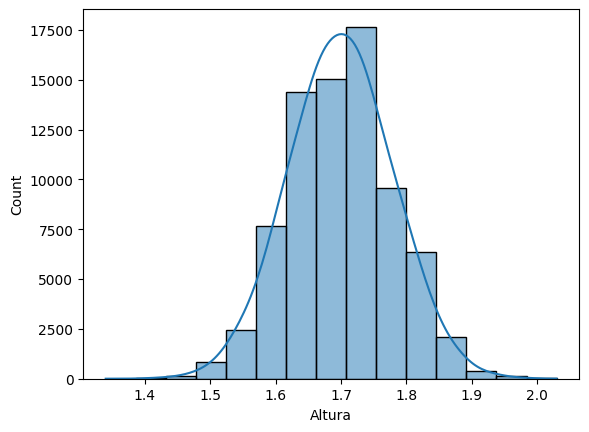

In [138]:
sns.histplot(data=dados, x='Altura', bins=15,
             kde=True, kde_kws={'bw_adjust':2})
plt.show()

In [109]:
print(f"Média:{dados['Altura'].mean()}\nMediana:{dados['Altura'].median()}\nModa:{dados['Altura'].mode()[0]}")

Média:1.6995084591358667
Mediana:1.7
Moda:1.7


##### **Idade**

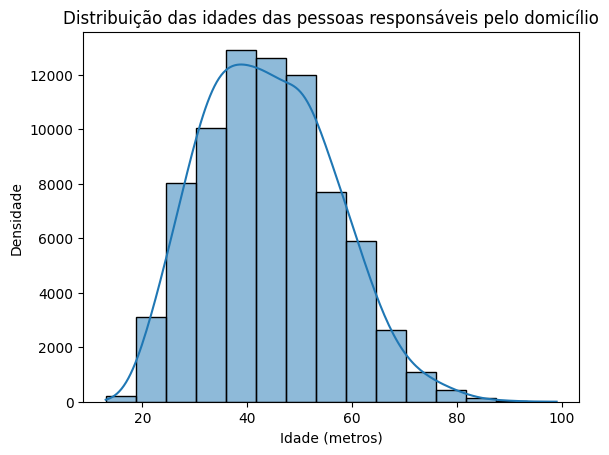

In [140]:
sns.histplot(data=dados, x='Idade', bins=15,
             kde=True, kde_kws={'bw_adjust':2})

plt.title('Distribuição das idades das pessoas responsáveis pelo domicílio')
plt.xlabel('Idade (metros)')
plt.ylabel('Densidade')
plt.show()

In [111]:
print(f"Média:{dados['Idade'].mean()}\nMediana:{dados['Idade'].median()}\nModa:{dados['Idade'].mode()[0]}")

Média:44.07142113482561
Mediana:43.0
Moda:40


## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [112]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [113]:
import math

In [147]:
dados_15k = dados[dados['Renda'] <= 15000]

In [148]:
n = len(dados_15k)

In [149]:
k = 1 + (10/3) * math.log10(n)
k

17.273544154972114

In [150]:
dados_15k['faixa_salarial'] = pd.cut(dados_15k['Renda'], bins=int(k), include_lowest=True)
dados_15k.head()

/tmp/ipython-input-755176823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_15k['faixa_salarial'] = pd.cut(dados_15k['Renda'], bins=int(k), include_lowest=True)


,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,faixa_salarial
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos,"(-15.001, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos,"(-15.001, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos,"(-15.001, 882.353]"


In [157]:
tabela_frequencias = dados_15k.groupby('faixa_salarial', observed=False).size().reset_index(name='frequencia')

tabela_frequencias['porcentagem'] = (tabela_frequencias['frequencia'] / len(dados_15k)) * 100

tabela_frequencias

,faixa_salarial,frequencia
0,"(-15.001, 882.353]",26311
1,"(882.353, 1764.706]",25816
2,"(1764.706, 2647.059]",10905
3,"(2647.059, 3529.412]",4854
4,"(3529.412, 4411.765]",2133
5,"(4411.765, 5294.118]",2180
6,"(5294.118, 6176.471]",1002
7,"(6176.471, 7058.824]",672
8,"(7058.824, 7941.176]",208
9,"(7941.176, 8823.529]",554


#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

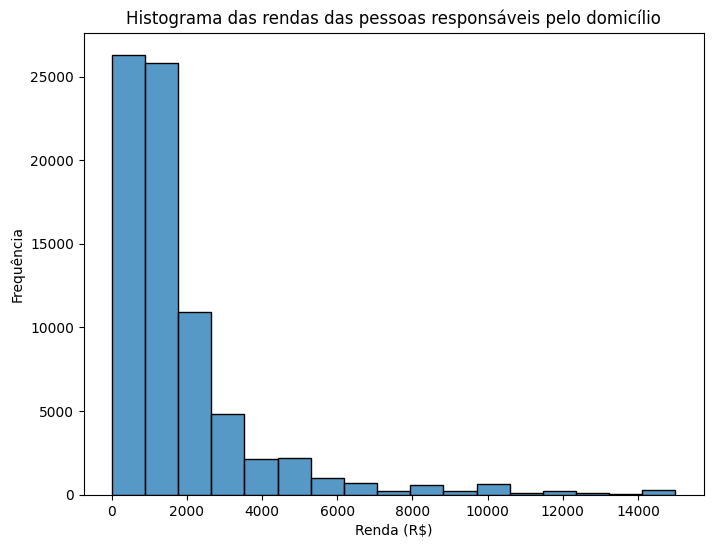

In [154]:
plt.figure(figsize=(8,6))

sns.histplot(data=dados_15k, x='Renda', bins=int(k))
plt.title('Histograma das rendas das pessoas responsáveis pelo domicílio')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')

plt.show()

In [155]:
dados_15k.Renda.describe()

,Renda
count,76219.000000
mean,1809.045579
std,2016.749586
min,0.000000
25%,788.000000
50%,1200.000000
75%,2000.000000
max,15000.000000


> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



> #### Conclusões

Cerca de 75% das pessoas entrevistadas apresentam uma Renda de até 2,000

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [159]:
percentual_1m = (dados['Renda'] <= 788).sum() / len(dados) * 100
percentual_1m

np.float64(28.86777719937533)

##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [160]:
dados['Renda'].quantile(0.95)

np.float64(6000.0)

##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [164]:
dados['Renda'].quantile(0.99)

np.float64(15000.0)

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [168]:
renda_6k = dados[dados['Renda'] <= 6000]
renda_6k

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


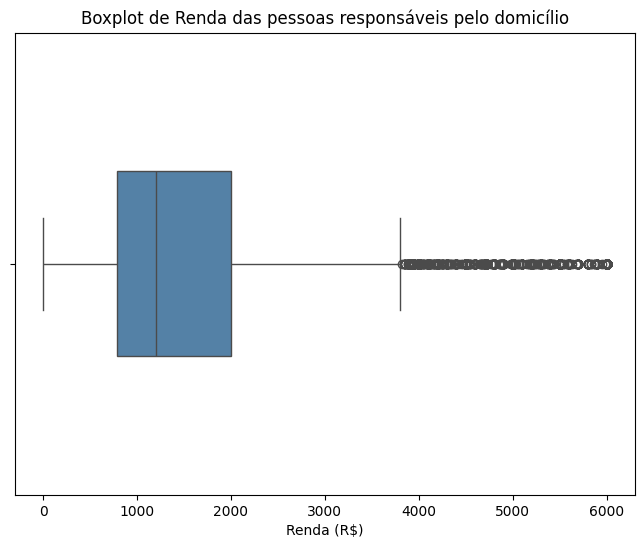

In [169]:
plt.figure(figsize=(8,6))

sns.boxplot(x=renda_6k['Renda'], color='steelblue')

# Adicionando título e rótulos aos eixos
plt.title('Boxplot de Renda das pessoas responsáveis pelo domicílio')
plt.xlabel('Renda (R$)')

# Ajustando os limites do eixo Y (o equivalente ao scale_y_continuous no ggplot2)
plt.ylim(-1, 1)

# Exibindo o gráfico
plt.show()

In [170]:
# Calculando os quartis
resumo_renda_6k = {
    'Q1': renda_6k['Renda'].quantile(0.25),
    'Q2': renda_6k['Renda'].quantile(0.50),
    'Q3': renda_6k['Renda'].quantile(0.75)
}

# Exibindo os resultados
resumo_renda_6k

{'Q1': np.float64(788.0), 'Q2': np.float64(1200.0), 'Q3': np.float64(2000.0)}

> #### Conclusões

Cerca de 25% da empresa recebem até 788, até 50% recebem até 1,200 e até 75% recebem até 2,000.

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

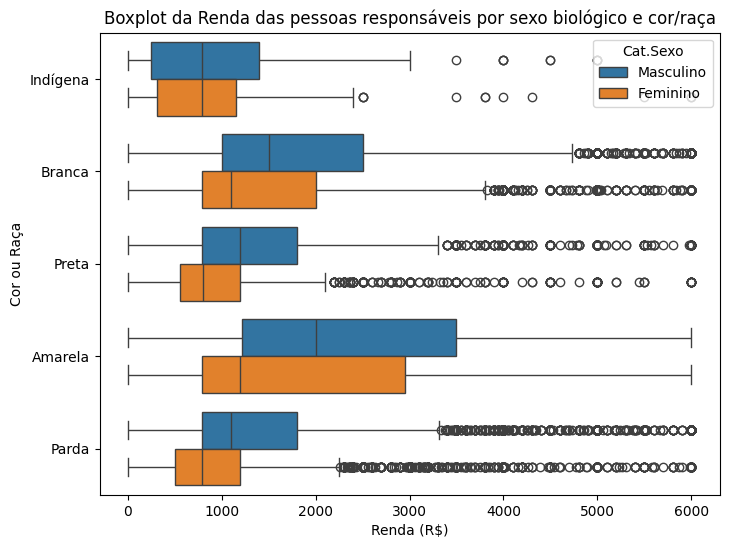

In [177]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='Cat.Cor', data=renda_6k, hue='Cat.Sexo')


plt.title('Boxplot da Renda das pessoas responsáveis por sexo biológico e cor/raça')
plt.xlabel('Renda (R$)')
plt.ylabel('Cor ou Raça')

plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

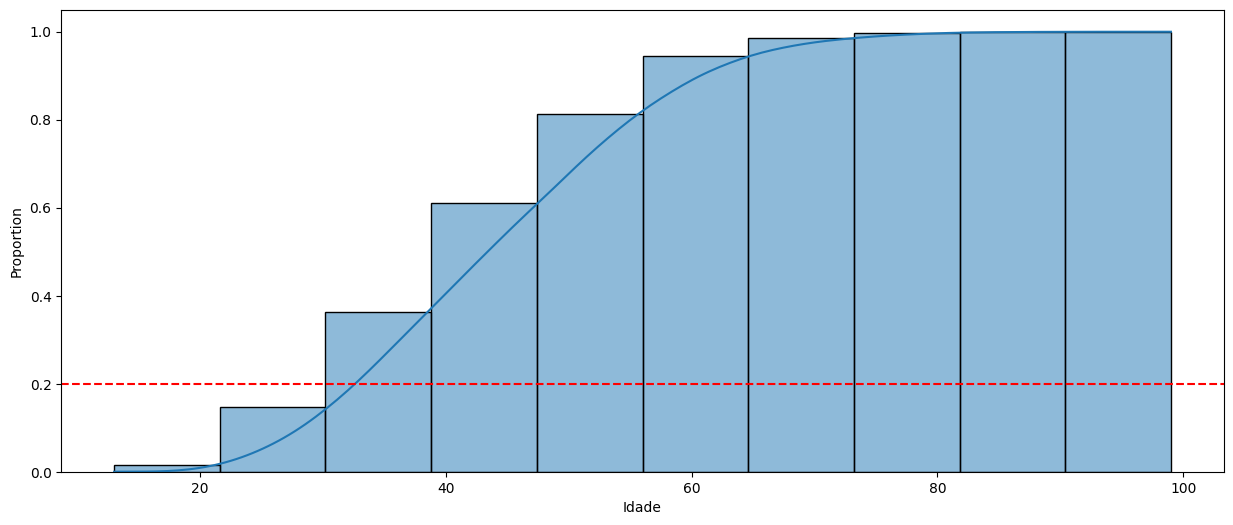

In [178]:
plt.figure(figsize=(15, 6))
sns.histplot(data=dados, x='Idade', bins= 10, cumulative=True, stat='proportion', kde=True )
plt.axhline(0.20, color='red', linestyle='dashed')

plt.show()

In [179]:
idades_classificacao = dados.copy()

In [180]:
# 1. Ordenar os dados pela coluna 'idade'
idades_classificacao = idades_classificacao.sort_values(by='Idade')

# 2. Adicionar a coluna 'cumulativo' (posição relativa de cada linha)
idades_classificacao['cumulativo'] = (idades_classificacao.reset_index().index + 1) / len(idades_classificacao)

# 3. Adicionar a coluna 'qualificado' com base no valor de 'cumulativo'
idades_classificacao['qualificado'] = idades_classificacao['cumulativo'] <= 0.20

# Exibindo o resultado
idades_classificacao.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True


In [181]:
idades_classificacao.tail(3)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,cumulativo,qualificado
1789,Acre,0,95,8,9,500,1.86,Masculino,Parda,8 anos,0.999974,False
11834,Maranhão,0,97,0,1,0,1.76,Masculino,Indígena,Sem instrução e menos de 1 ano,0.999987,False
74079,Goiás,0,99,4,1,0,1.65,Masculino,Preta,Sem instrução e menos de 1 ano,1.000000,False


In [183]:
idades_qualificados = idades_classificacao[idades_classificacao['qualificado'] == True]
idades_qualificados.tail()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo,cumulativo,qualificado
37555,Minas Gerais,0,33,8,12,788,1.60,Masculino,Parda,11 anos,0.199948,True
18203,Rio Grande do Norte,1,33,4,9,600,1.66,Feminino,Preta,8 anos,0.199961,True
18199,Rio Grande do Norte,1,33,8,7,200,1.54,Feminino,Parda,6 anos,0.199974,True
22744,Pernambuco,0,33,4,6,805,1.63,Masculino,Preta,5 anos,0.199987,True
12991,Maranhão,1,33,8,12,870,1.66,Feminino,Parda,11 anos,0.200000,True


In [184]:
len(idades_qualificados)

15368

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [187]:
estat_renda = dados['Renda'].agg(
    media='mean',
    mediana='median',
    mad=lambda x: (abs(x - x.mean())).mean()
).reset_index()

# Exibindo o resultado
round(estat_renda,2)

,index,Renda
0,media,2000.38
1,mediana,1200.00
2,mad,1526.50


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [188]:
estat_renda_anos_estudo = dados.groupby('Cat.Anos.de.Estudo', observed=False)['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()

estat_renda_anos_estudo

,Cat.Anos.de.Estudo,media,mediana,desvio_padrao
0,Sem instrução e menos de 1 ano,732.994187,600.0,955.274843
1,1 ano,806.524496,700.0,1203.866292
2,2 anos,842.560209,788.0,1298.873800
3,3 anos,980.044275,788.0,1907.138437
4,4 anos,1150.439293,900.0,1293.144934
5,5 anos,1183.575683,940.0,1328.709017
6,6 anos,1284.082618,1000.0,1326.140204
7,7 anos,1289.166233,1000.0,1279.412081
8,8 anos,1437.744862,1100.0,1404.280340
9,9 anos,1315.685870,1000.0,1888.373952


> #### Conclusões

Indivíduos com níveis mais elevados de escolaridade apresentam médias, medianas e desvios padrão de renda mensal superiores, o que indica não apenas salários mais altos, mas também uma maior dispersão nos valores, refletindo maior variabilidade nos rendimentos dentro desse grupo.

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [190]:
renda_15k = dados[dados['Renda'] <= 15000]
renda_15k

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


In [191]:
estatistica_15k = renda_15k.groupby('Cat.Sexo')['Renda'].agg(
    media = 'mean',
    mediana= 'median',
    desvio_padrao = 'std'
).reset_index()

estatistica_15k

/tmp/ipython-input-1094294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estatistica_15k = renda_15k.groupby('Cat.Sexo')['Renda'].agg(


,Cat.Sexo,media,mediana,desvio_padrao
0,Masculino,1964.351997,1300.0,2101.163468
1,Feminino,1460.143630,900.0,1763.686374


> #### Conclusões

Indivíduos do sexo biológico masculino apresentam valores mais elevados de média, mediana e desvio padrão da renda, evidenciando tanto rendimentos superiores quanto maior variabilidade entre eles.

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [203]:
dados_centro_oeste = dados[dados['UF'].isin(['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal'])]

In [205]:
dados_centro_unicos = dados_centro_oeste.UF.drop_duplicates()
dados_centro_unicos

,UF
68068,Mato Grosso do Sul
69508,Mato Grosso
71308,Goiás
74786,Distrito Federal


In [218]:
centro_oeste = ['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal']

In [224]:
dados_centro_oeste_10k = dados[((dados.UF.isin(centro_oeste)) & (dados.Renda <= 10000))]

In [226]:
dados_centro_oeste_10k.head(2)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
68068,Mato Grosso do Sul,0,53,2,12,1250,1.79,Masculino,Branca,11 anos
68069,Mato Grosso do Sul,0,19,2,9,764,1.75,Masculino,Branca,8 anos


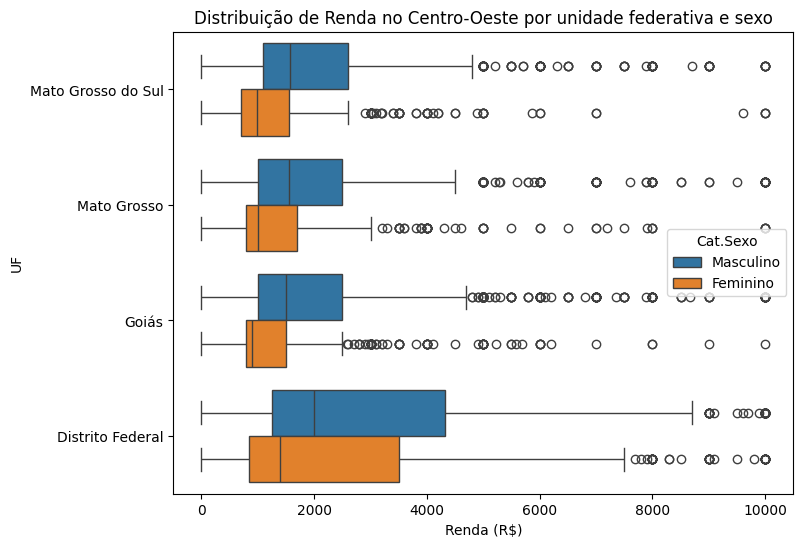

In [227]:
# Criando o boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='UF', data=dados_centro_oeste_10k, hue='Cat.Sexo')

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Renda no Centro-Oeste por unidade federativa e sexo')
plt.xlabel('Renda (R$)')
plt.ylabel('UF')

# Exibindo o gráfico
plt.show()

##### **Média**

In [229]:
renda_10k_centro_oeste_media = round(pd.crosstab(dados_centro_oeste_10k['Cat.Sexo'], dados_centro_oeste_10k['UF'], values=dados_centro_oeste_10k['Renda'], aggfunc='mean'), 2)

renda_10k_centro_oeste_media

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
Cat.Sexo,,,,
Masculino,3138.46,2030.06,2092.10,2181.73
Feminino,2551.87,1284.65,1548.93,1396.69


##### **Mediana**

In [230]:
renda_10k_centro_oeste_mediana = round(pd.crosstab(dados_centro_oeste_10k['Cat.Sexo'], dados_centro_oeste_10k['UF'], values=dados_centro_oeste_10k['Renda'], aggfunc='median'), 2)

renda_10k_centro_oeste_mediana

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
Cat.Sexo,,,,
Masculino,2000.0,1500.0,1560.0,1576.0
Feminino,1400.0,900.0,1000.0,986.0


##### **Desvio Padrão**

In [231]:
renda_10k_centro_oeste_desvio = round(pd.crosstab(dados_centro_oeste_10k['Cat.Sexo'], dados_centro_oeste_10k['UF'], values=dados_centro_oeste_10k['Renda'], aggfunc='std'), 2)

renda_10k_centro_oeste_desvio

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
Cat.Sexo,,,,
Masculino,2513.43,1587.38,1707.91,1773.44
Feminino,2451.17,1110.00,1508.59,1400.90
